# Plot S4 vs time in function of: frequency and constelation v3.0
### It includes elevation info, data is filtered for elev>35º, and then it is filtered again for s4>0.3
### Corrections given by Cesar Valladares is also done
Target:
![plot_s4_v2](plot_s4_v2.png)

In [2]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

## 1) Import scintilacion files (.s4)  

In [3]:
directorio = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/Input_data/Data_procesada/"
file_name = "ljic_200806.s4"
df1 = pd.read_csv(directorio + file_name, header=None, sep="\t")
df1.head(3)

,0,1,2,3,4,5,6,7,8,9,...,810,811,812,813,814,815,816,817,818,819
0,20,219,4560,33,G10,3.0,26.0,0.097,0.082,0.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,219,4620,33,G10,3.0,26.0,0.108,0.079,0.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,219,4680,33,G10,3.0,27.0,0.112,0.084,0.098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 820 entries, 0 to 819
dtypes: float64(499), int64(4), object(317)
memory usage: 96.2+ KB


## 2. Process the dataframe

In [5]:
# Eliminacion de ciertas columnas
for i in df1.columns:
    if i>3:
        m = (i-4)%24
        #if m == 1: del df1[i] # delete azimuth
        #elif m == 2: del df1[i] # delete elevation
        if m >= 9: del df1[i]

df1.head()

,0,1,2,3,4,5,6,7,8,9,...,780,796,797,798,799,800,801,802,803,804
0,20,219,4560,33,G10,3.0,26.0,0.097,0.082,0.089,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,219,4620,33,G10,3.0,26.0,0.108,0.079,0.089,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,219,4680,33,G10,3.0,27.0,0.112,0.084,0.098,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,219,4740,33,G10,3.0,27.0,0.102,0.082,0.091,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,219,4800,33,G10,4.0,27.0,0.110,0.078,0.105,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 310 entries, 0 to 804
dtypes: float64(192), int64(4), object(114)
memory usage: 36.4+ KB


In [7]:
df1.columns = np.arange(len(df1.columns)) # Rename the columns 
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,20,219,4560,33,G10,3.0,26.0,0.097,0.082,0.089,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,219,4620,33,G10,3.0,26.0,0.108,0.079,0.089,...,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Creacion de un nuevo dataframe
df2 = pd.DataFrame(columns=range(12))

# Se llenan el resto de valores
T = 9 # Period of dataset
for i in range(len(df1)):
    for h in range(df1.iloc[i,3]): # that cell contains the number of measurements 
        m = df1.iloc[i,[0, 1, 2, 4+T*h, 5+T*h, 6+T*h, 7+T*h, 8+T*h, 9+T*h, 10+T*h, 11+T*h, 12+T*h]]
        m.index = range(len(m))
        df2 = df2.append(m)

df2.index = range(len(df2))
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,20,219,4560,G10,3.0,26.0,0.097,0.082,0.089,0.082,0.06,0.058
1,20,219,4560,G12,61.0,14.0,0.147,0.094,0.196,0.196,nan,nan
2,20,219,4560,G18,169.0,64.0,0.043,0.036,0.067,0.033,0.024,0.02
3,20,219,4560,G20,38.0,49.0,0.040,0.044,nan,nan,nan,nan
4,20,219,4560,G21,304.0,36.0,0.045,0.051,nan,nan,nan,nan


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 12 columns):
0     497 non-null object
1     497 non-null object
2     497 non-null object
3     497 non-null object
4     496 non-null float64
5     496 non-null float64
6     497 non-null float64
7     497 non-null float64
8     497 non-null object
9     497 non-null object
10    497 non-null object
11    497 non-null object
dtypes: float64(4), object(8)
memory usage: 46.7+ KB


In [10]:
# Change type object to double 
for i in range(3):
    df2[i] = df2[i].astype("int")

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 12 columns):
0     497 non-null int64
1     497 non-null int64
2     497 non-null int64
3     497 non-null object
4     496 non-null float64
5     496 non-null float64
6     497 non-null float64
7     497 non-null float64
8     497 non-null object
9     497 non-null object
10    497 non-null object
11    497 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 46.7+ KB


In [12]:
# Change data type to str and then to float
for i in range(6):
    df2[6+i] = df2[6+i].astype("str").str.strip().astype("float")
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,20,219,4560,G10,3.0,26.0,0.097,0.082,0.089,0.082,0.060,0.058
1,20,219,4560,G12,61.0,14.0,0.147,0.094,0.196,0.196,NaN,NaN
2,20,219,4560,G18,169.0,64.0,0.043,0.036,0.067,0.033,0.024,0.020
3,20,219,4560,G20,38.0,49.0,0.040,0.044,NaN,NaN,NaN,NaN
4,20,219,4560,G21,304.0,36.0,0.045,0.051,NaN,NaN,NaN,NaN


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 12 columns):
0     497 non-null int64
1     497 non-null int64
2     497 non-null int64
3     497 non-null object
4     496 non-null float64
5     496 non-null float64
6     497 non-null float64
7     497 non-null float64
8     338 non-null float64
9     338 non-null float64
10    189 non-null float64
11    189 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 46.7+ KB


In [14]:
# Rename columns 
df2.columns = ["YY", "DOY", "SOD", "PRN", "Azimuth", "Elevation", "S4_sig1", "S4_sig1_corr", "S4_sig2", "S4_sig2_corr", "S4_sig3", "S4_sig3_corr"]
df2.head()

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig1_corr,S4_sig2,S4_sig2_corr,S4_sig3,S4_sig3_corr
0,20,219,4560,G10,3.0,26.0,0.097,0.082,0.089,0.082,0.060,0.058
1,20,219,4560,G12,61.0,14.0,0.147,0.094,0.196,0.196,NaN,NaN
2,20,219,4560,G18,169.0,64.0,0.043,0.036,0.067,0.033,0.024,0.020
3,20,219,4560,G20,38.0,49.0,0.040,0.044,NaN,NaN,NaN,NaN
4,20,219,4560,G21,304.0,36.0,0.045,0.051,NaN,NaN,NaN,NaN


In [15]:
# Calculate the corrected S4
def get_correctedS4(row):
    s4 = row[0]
    correction= row[1]
    
    # Treat nan numbers 
    if pd.isnull(s4) or pd.isnull(correction):
        return np.nan
    else:
        # Calculate the corrected S4
        x = s4**2-correction**2
        if x>0:
            return x**0.5
        else:
            return 0    

for i in range(3):        
    df2[f"S4_sig{i+1}"] = df2[[f"S4_sig{i+1}",f"S4_sig{i+1}_corr"]].apply(get_correctedS4, axis=1)
df2.head()

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig1_corr,S4_sig2,S4_sig2_corr,S4_sig3,S4_sig3_corr
0,20,219,4560,G10,3.0,26.0,0.051817,0.082,0.034598,0.082,0.015362,0.058
1,20,219,4560,G12,61.0,14.0,0.113018,0.094,0.000000,0.196,NaN,NaN
2,20,219,4560,G18,169.0,64.0,0.023516,0.036,0.058310,0.033,0.013266,0.020
3,20,219,4560,G20,38.0,49.0,0.000000,0.044,NaN,NaN,NaN,NaN
4,20,219,4560,G21,304.0,36.0,0.000000,0.051,NaN,NaN,NaN,NaN


In [16]:
# Delete some columns
del df2["S4_sig1_corr"]
del df2["S4_sig2_corr"]
del df2["S4_sig3_corr"]
df2.head()

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
0,20,219,4560,G10,3.0,26.0,0.051817,0.034598,0.015362
1,20,219,4560,G12,61.0,14.0,0.113018,0.000000,NaN
2,20,219,4560,G18,169.0,64.0,0.023516,0.058310,0.013266
3,20,219,4560,G20,38.0,49.0,0.000000,NaN,NaN
4,20,219,4560,G21,304.0,36.0,0.000000,NaN,NaN


In [17]:
# Sort values by "PRN" and "SOD" 
df2 = df2.sort_values(["PRN","SOD"])

# Reindex in ascendent order 
df2.index = range(len(df2))

df2

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
0,20,219,4560,C12,262.0,27.0,0.039243,0.035889,0.009644
1,20,219,4620,C12,261.0,27.0,0.071951,0.056223,0.019596
2,20,219,4680,C12,261.0,28.0,0.056214,0.065230,0.009747
3,20,219,4740,C12,260.0,28.0,0.044306,0.055182,0.000000
4,20,219,4800,C12,260.0,28.0,0.049315,0.058129,0.000000
5,20,219,4860,C12,259.0,28.0,0.035875,0.046508,0.000000
6,20,219,4920,C12,259.0,28.0,0.026552,0.056921,0.017234
7,20,219,4980,C12,258.0,28.0,0.040212,0.045596,0.000000
8,20,219,5040,C12,258.0,28.0,0.069174,0.046904,0.000000
9,20,219,5100,C12,257.0,28.0,0.075120,0.053245,0.013711


In [18]:
# Convert to datetime data type 
def change2datetime(row):
    yy = int(row[0])
    doy = int(row[1])
    sod = int(row[2])
    
    if sod < 0: 
        doy = doy -1
        sod = 60*60*24+sod      
    
    cdate = str(yy)+"-"+str(doy)+"-"+str(datetime.timedelta(seconds=sod))
    fecha = datetime.datetime.strptime(cdate, "%y-%j-%X")
    
    return fecha  

# Convert and assign
m = df2.apply(change2datetime, axis=1)

# Create the new column
df2.insert(0,column="DateTime",value=0)
df2["DateTime"] = m

# Delete some columns 
del df2["YY"]
del df2["DOY"]
del df2["SOD"]

df2

,DateTime,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
0,2020-08-06 01:16:00,C12,262.0,27.0,0.039243,0.035889,0.009644
1,2020-08-06 01:17:00,C12,261.0,27.0,0.071951,0.056223,0.019596
2,2020-08-06 01:18:00,C12,261.0,28.0,0.056214,0.065230,0.009747
3,2020-08-06 01:19:00,C12,260.0,28.0,0.044306,0.055182,0.000000
4,2020-08-06 01:20:00,C12,260.0,28.0,0.049315,0.058129,0.000000
5,2020-08-06 01:21:00,C12,259.0,28.0,0.035875,0.046508,0.000000
6,2020-08-06 01:22:00,C12,259.0,28.0,0.026552,0.056921,0.017234
7,2020-08-06 01:23:00,C12,258.0,28.0,0.040212,0.045596,0.000000
8,2020-08-06 01:24:00,C12,258.0,28.0,0.069174,0.046904,0.000000
9,2020-08-06 01:25:00,C12,257.0,28.0,0.075120,0.053245,0.013711


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
DateTime     497 non-null datetime64[ns]
PRN          497 non-null object
Azimuth      496 non-null float64
Elevation    496 non-null float64
S4_sig1      497 non-null float64
S4_sig2      338 non-null float64
S4_sig3      189 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 27.3+ KB


In [20]:
df2.set_index("DateTime", inplace=True)
df2.head()

,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
DateTime,,,,,,
2020-08-06 01:16:00,C12,262.0,27.0,0.039243,0.035889,0.009644
2020-08-06 01:17:00,C12,261.0,27.0,0.071951,0.056223,0.019596
2020-08-06 01:18:00,C12,261.0,28.0,0.056214,0.065230,0.009747
2020-08-06 01:19:00,C12,260.0,28.0,0.044306,0.055182,0.000000
2020-08-06 01:20:00,C12,260.0,28.0,0.049315,0.058129,0.000000


In [21]:
df2_copy = df2.copy()

### Filtering S4 data based on the angle and the S4 value

In [22]:
def filter_elev_s4(row):
    elev = row[0]
    s4 = row[1]
    threshold_s4 = 0.3
    threshold_elev = 35 # Unit: º
    
    if elev < threshold_elev:
        return [s4, np.nan, np.nan]
    elif s4 < threshold_s4:
        return [np.nan, s4, np.nan]
    else:
        return [np.nan, np.nan, s4]

In [23]:
#df2_aux = df2.copy()

for j in range(3):
    j += 1
    df_aux = df2[["Elevation", f"S4_sig{j}"]].apply(filter_elev_s4, axis=1, result_type="expand")
    df_aux.rename(columns={0:f"S4_sig{j}_1", 1:f"S4_sig{j}_2", 2:f"S4_sig{j}_3"}, inplace=True)
    df2 = pd.concat([df2, df_aux], join='inner', axis=1)
    #del df2_aux[f"S4_sig{j}"]

In [24]:
print(len(df2))
df2.head()

497


,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3,S4_sig1_1,S4_sig1_2,S4_sig1_3,S4_sig2_1,S4_sig2_2,S4_sig2_3,S4_sig3_1,S4_sig3_2,S4_sig3_3
DateTime,,,,,,,,,,,,,,,
2020-08-06 01:16:00,C12,262.0,27.0,0.039243,0.035889,0.009644,0.039243,NaN,NaN,0.035889,NaN,NaN,0.009644,NaN,NaN
2020-08-06 01:17:00,C12,261.0,27.0,0.071951,0.056223,0.019596,0.071951,NaN,NaN,0.056223,NaN,NaN,0.019596,NaN,NaN
2020-08-06 01:18:00,C12,261.0,28.0,0.056214,0.065230,0.009747,0.056214,NaN,NaN,0.065230,NaN,NaN,0.009747,NaN,NaN
2020-08-06 01:19:00,C12,260.0,28.0,0.044306,0.055182,0.000000,0.044306,NaN,NaN,0.055182,NaN,NaN,0.000000,NaN,NaN
2020-08-06 01:20:00,C12,260.0,28.0,0.049315,0.058129,0.000000,0.049315,NaN,NaN,0.058129,NaN,NaN,0.000000,NaN,NaN


In [25]:
#df2.to_csv("rawData2.csv")

Congratulations! The dataframe is ready to plot (y)

## 3. Plot 

### Extract data

#### a) Functions

a.1) Extract the available constellations 

In [26]:
# Identify the available constellations 
def extract_const():
    const = df2["PRN"].str[0].unique() # extract the first character of each cell 
    return const

# Test
extract_const()

array(['C', 'E', 'G', 'R', 'S'], dtype=object)

a.2) Extract the available PRNs of a constellation

In [27]:
# Extract PRNs of a constellation and freq which there is no null data    
def extract_prns(const, freq): # const: char (e.g. 'G')
    prns = df2["PRN"].unique().tolist()
    PRNs = [value for value in prns if const in value]
    PRNs.sort(key=lambda x: int(x[1:])) # sort in ascendent order 
    
    # Check no null columns in the prns
    prn_values = []
    for value in PRNs:
        mask = df2["PRN"] == value
        df_test = df2[mask]
        if df_test[freq].isna().sum() < len(df_test): # when the column is not null 
            prn_values.append(value)
    
    return prn_values

# Test 
freq_list = ['S4_sig1', 'S4_sig2', 'S4_sig3'] 
const = 'S'

extract_prns(const, freq_list[0])

['S25', 'S31', 'S33', 'S38']

#### b) Extract S4 data

In [28]:
def get_s4(prn, freq): # prn: str (e.g. 'C14') ; freq: str (e.g. 'S4_sig1')  
    mask = df2["PRN"] == prn
    df_aux = df2[mask]
    #df_final = df_aux[freq]
    df_final_1 = df_aux[freq + "_1"]
    df_final_2 = df_aux[freq + "_2"]
    df_final_3 = df_aux[freq + "_3"]
    
    return {1: df_final_1, 2: df_final_2, 3: df_final_3} 

# Test

s4_data = get_s4("C14", freq_list[0])
s4_data[1].head()

Series([], Name: S4_sig1_1, dtype: float64)

#### c) Extract elevation info

In [29]:
def get_elevation(prn, freq):
    mask = df2["PRN"] == prn
    df_aux = df2[mask]
    df_final = df_aux["Elevation"]
    
    return df_final

# Test
df_test = get_elevation('G13', freq_list[2])
df_test.head()
    

Series([], Name: Elevation, dtype: float64)

### Plot

#### a) Functions

a.1) Date functions

In [30]:
# Get file date
file_name = "ljic_200926.s4"
fecha = file_name[5:-3]
fecha2 = datetime.datetime.strptime(fecha, "%y%m%d")
fecha3 = datetime.datetime.strftime(fecha2,"%Y/%m/%d")
fecha2 

datetime.datetime(2020, 9, 26, 0, 0)

In [31]:
fecha2_tomorrow = fecha2 + pd.DateOffset(days=1)
fecha2_tomorrow = fecha2_tomorrow.to_pydatetime()
fecha2_tomorrow

datetime.datetime(2020, 9, 27, 0, 0)

In [32]:
# Get UTC day range to add a vertical span
fecha_morning_first = fecha2 + pd.DateOffset(hours=11)
fecha_morning_first = fecha_morning_first.to_pydatetime()
fecha_morning_first

datetime.datetime(2020, 9, 26, 11, 0)

In [33]:
fecha_morning_last = fecha2 + pd.DateOffset(hours=23)
fecha_morning_last = fecha_morning_last.to_pydatetime()
fecha_morning_last

datetime.datetime(2020, 9, 26, 23, 0)

a.2) Other functions

In [34]:
def convert2SVID(prn):
    if prn[0] == "S":
        nn = int(prn[1:])
        if 20 <= nn <= 40:
            return str(nn + 100)
        elif 41 <= nn <= 58:
            return str(nn + 157)
    else:
        return prn

In [35]:
# Get the frequency name and value for a given PRN code and Freq code
def get_freq_name(const, freq_code):
    if freq_code == 1:
        if const == 'G':
            return {"name":'L1CA', "value":"1575.42"}
        elif const == 'R':
            return {"name":'L1CA', "value":"1602"} # change 
        elif const == 'S':
            return {"name":'L1CA', "value":"1575.42"}
        elif const == 'J':
            return {"name":'L1CA', "value":"1575.42"}
        elif const == 'E':
            return {"name":'L1BC', "value":"1575.42"}
        elif const == 'C':
            return {"name":'B1', "value":"1575.42"}
        elif const == 'I':
            return {"name":'B1', "value":"1176.45"}
        else: 
            return "Insert a right code!"
    elif freq_code == 2:
        if const == 'G':
            return {"name":'L2C', "value":"1227.60"}
        elif const == 'R':
            return {"name":'L2C', "value":"1246"} # change 
        elif const == 'J':
            return {"name":'L2C', "value":"1227.60"}
        elif const == 'E':
            return {"name":'E5a', "value":'1176.45'}
        elif const == 'C':
            return {"name":'B2', "value":'1176.45'}
        elif const == 'S':
            return {"name":'L5', "value":'1176.45'}
        else: 
            return "Insert a right code!"
    elif freq_code == 3:
        if const == 'G':
            return {"name":'L5', "value":'1176.45'}
        elif const == 'J':
            return {"name":'L5', "value":'1176.45'}
        elif const == 'E':
            return {"name":'E5b', "value":'1207.14'}
        elif const == 'C':
            return {"name":'B3', "value":'1268.52'}
        else: 
            return "Insert a right code!"
    else:
        return "Insert a right code!"

In [36]:
# Get the name for a given PRN code
def get_prn_name(const):
    if const == 'G': return 'GPS'
    elif const == 'R': return 'GLONASS'
    elif const == 'E': return 'GALILEO'
    elif const == 'S': return 'SBAS'
    elif const == 'C': return 'BEIDOU'
    elif const == 'J': return 'QZSS'
    elif const == 'I': return 'IRNSS'
    else:
        return 'Incorrect PRN code!'

#### b) Plot 

In [37]:
def convert_GPS2SBAS_frequency(freq):
    if freq == 'S4_sig1': return freq
    elif freq == 'S4_sig3': return 'S4_sig2'    

In [38]:
def append_sbas_prns(const, freq, PRNs):
    const_sbas = 'S'
    if const == 'G':
        while freq != 'S4_sig2':
            freq_sbas = convert_GPS2SBAS_frequency(freq)
            PRNs_SBAS = extract_prns(const_sbas, freq_sbas)
            PRNs += PRNs_SBAS
            break
        return PRNs
    elif const == 'E':
        while freq != 'S4_sig3':
            freq_sbas = freq
            PRNs_SBAS = extract_prns(const_sbas, freq_sbas)
            PRNs += PRNs_SBAS
            break
        return PRNs
    else:
        return PRNs  

In [39]:
def change_frequency(const, freq):
    if const == 'G':
        return convert_GPS2SBAS_frequency(freq)
    elif const == 'E':
        return freq
    else:
        return freq

In [59]:
def plot_s4(const, freq, sbas=False):
    # Get the PRNs
    PRNs = extract_prns(const, freq)
    
    # Include SBAS data if corresponds
    if sbas: PRNs = append_sbas_prns(const, freq, PRNs)
    
    # Create the figure with the subplots 
    n_rows = (len(PRNs)+1)//2
    n_cols = 2
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(7*n_cols,1*n_rows), sharex="col", sharey="row",
                    gridspec_kw={'hspace': 0, 'wspace': 0})   
    j = 0

    for ax in axs.T.reshape(-1): # Plot up to down, rather than left to right 
        # ax -> s4
        # ax2 -> elevation
        ax2 = ax.twinx()
        
        if j < len(PRNs):
            # Plot s4 info
            prn_value = PRNs[j]
            
            # -> Get the correct freq if sbas==True
            if sbas and prn_value[0]=='S': 
                freq_n = change_frequency(const, freq)
            else: freq_n = freq
                
            df3_s4 = get_s4(prn_value, freq_n)
            
            color1 = "blue" # This color is used in y axis labels, ticks and border  
            colors1 = ["lightsteelblue", "cornflowerblue", "navy"] # These colors are used for the plots

            for k in range(3):
                df4_s4 = df3_s4[k+1]

                ax.plot(df4_s4.index, df4_s4.values, '.', color=colors1[k], markersize=2)
                ax.set_facecolor(color="lightgrey")
                ax.axvspan(fecha_morning_first, fecha_morning_last, color="white") # strip morning/night
            
            # Plot elevation info
            df3_elev = get_elevation(PRNs[j], freq)
            
            color2 = "orange"
            ax2.plot(df3_elev.index, df3_elev.values, '.', color=color2, markersize=1)
            
            # Annotate the prn in the subplot
            x_location = fecha2 + pd.Timedelta(minutes=30)
            ax2.text(x_location, 35, convert2SVID(PRNs[j]), fontsize=15, weight='roman') # 0.375

        # Set axis limits 
        ax.set_xlim([fecha2, fecha2_tomorrow])
        ax.set_ylim([0,1])
        ax2.set_ylim([0,90])

        # Set ticks and tick labels 
        # Set y axis format, labels odds subplots only
        len_half_ax = len(axs.T.reshape(-1))/2

        if j >= len_half_ax: # change only for the 2nd column
            k=j-len_half_ax

            # Set y labels only to even subplots
            ax.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax.set_yticks([0,1])
            ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax2.set_yticks([0,90])

            if k%2 == 0: 
                ax.set_yticklabels([0,1])
                ax2.set_yticklabels([0,90])
            else:    
                ax.set_yticklabels(['',''])
                ax2.set_yticklabels(['',''])

            # Set yellow color to the right y axis
            for axis in ['top','bottom','left']:
                ax.spines[axis].set_linewidth(2)
                ax2.spines[axis].set_linewidth(2)

            ax.spines['right'].set_color(color2)
            ax.spines['right'].set_linewidth(2)
            ax2.spines['right'].set_color(color2)
            ax2.spines['right'].set_linewidth(2)
            ax2.tick_params(axis='y', which='both', colors=color2)

        else: # apply some changes to the 1st column 
            # remove y tick labels for elevation 
            ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax2.set_yticks([0,90])
            ax2.set_yticklabels(['',''])

            # set linewidth to top, bottom and right borders of the subplot
            for axis in ['top','bottom','right']:
                ax.spines[axis].set_linewidth(2)
                ax2.spines[axis].set_linewidth(2)

            # Set blue color to the left y axis
            ax.spines['left'].set_color(color1)
            ax.spines['left'].set_linewidth(2)
            ax2.spines['left'].set_color(color1)
            ax2.spines['left'].set_linewidth(2)
            ax.tick_params(axis='y', which='both', colors=color1)

        # set x axis format 
        hours = mdates.HourLocator(interval = 2)
        ax.xaxis.set_major_locator(hours) # ticks interval: 2h
        ax.xaxis.set_minor_locator(AutoMinorLocator(2)) # minor tick division: 2
        myFmt = DateFormatter("%H")
        ax.xaxis.set_major_formatter(myFmt) # x format: hours 
        
        # set the ticks style 
        ax.xaxis.set_tick_params(width=2, length=8, which='major', direction='out')
        ax.xaxis.set_tick_params(width=1, length=4, which='minor', direction='out')
        ax.yaxis.set_tick_params(width=2, length=15, which='major', direction='inout')
        ax.yaxis.set_tick_params(width=1, length=4, which='minor', direction='out')
        ax2.yaxis.set_tick_params(width=2, length=15, which='major', direction='inout')
        ax2.yaxis.set_tick_params(width=1, length=4, which='minor', direction='out')

        # set the label ticks 
        ax.tick_params(axis='x', which='major', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax2.tick_params(axis='y', labelsize=12)
        
        # set grid
        ax.grid(which='major', axis='both', ls=':', linewidth=1.2)
        ax.grid(which='minor', axis='both', ls=':', alpha=0.5)

        # Set title and axis labels 
        aux = get_freq_name(const, int(freq[-1]))
        frequency_name = aux["name"]
        frequency_value = aux["value"] + "MHz"
        
        # -> Title 
        if j == 0: # Subplot on Upper left  
            fig.text(0, 1, fecha3, ha='left', va='bottom', fontsize=17, weight='roman', transform=ax.transAxes)
            fig.text(0.5, 1, 'Jicamarca', ha='left', va='bottom', fontsize=17, weight='semibold', transform=ax.transAxes)   
                       
        if j == n_rows-1: # Subplot on Lower left 
            pass
        
        if j == n_rows: # Subplot on Upper right
            fig.text(0, 1, 'S4', ha='center', va='bottom', fontsize=17, weight='roman', transform=ax.transAxes)
            fig.text(0.5, 1, frequency_value, ha='center', va='bottom', fontsize=17, weight='roman', transform=ax.transAxes)
            fig.text(1, 1, f"{frequency_name} | {get_prn_name(const)}", ha='right', va='bottom', fontsize=17, weight='roman', transform=ax.transAxes)

        # -> Axis labels            
        if j == n_rows*n_cols-1: # Subplot on Lower right
            fig.text(0, -0.6, 'Time UTC', ha='center', va='center', fontsize=14, transform=ax.transAxes) 
            
        if j == int(n_rows/2): # y axis label on the left
            k = (n_rows%2)*0.5
            fig.text(-0.1, 1-k, 'S4', ha='center', va='center', rotation='vertical', fontsize=14, color='b', transform=ax.transAxes)            
            
        if j == int(n_rows*n_cols-n_rows/2): # y axis label on the right 
            k = (n_rows%2)*0.5
            fig.text(1.1, 1-k, 'Elevation Angle', ha='center', va='center', rotation=-90, fontsize=14, color=color2, transform=ax.transAxes)

        """    
        # -> Labels
        fig.text(0.513, 0.08, 'Time UTC', ha='center', va='center', fontsize=14)
        fig.text(0.09, 0.5, 'S4', ha='center', va='center', rotation='vertical', fontsize=14, color='b')
        fig.text(0.94, 0.5, 'Elevation Angle', ha='center', va='center', rotation=-90, fontsize=14, color=color2)
        # -> Title
        fig.text(0.513, 0.895, 'S4', ha='center', va='center', fontsize=17, weight='roman')
        fig.text(0.32, 0.895, 'Jicamarca', ha='center', va='center', fontsize=17, weight='roman', color='r')
        fig.text(0.12, 0.895, fecha3, ha='left', va='center', fontsize=17, weight='roman')
        fig.text(0.9, 0.895, f"{frequency_name} | {get_prn_name(const)}", ha='right', va='center', fontsize=17, weight='roman')
        fig.text(0.72, 0.895, frequency_value, ha='right', va='center', fontsize=17, weight='roman')

        # Save figure as pdf
        #file_path = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/Output_data/test/"
        #file_name = f"s4_{get_prn_name(prn)}_{frequency_name}.pdf"
        #plt.savefig(file_path + file_name, bbox_inches='tight')
        """
        j += 1
    
    return 'Ok'

'Ok'

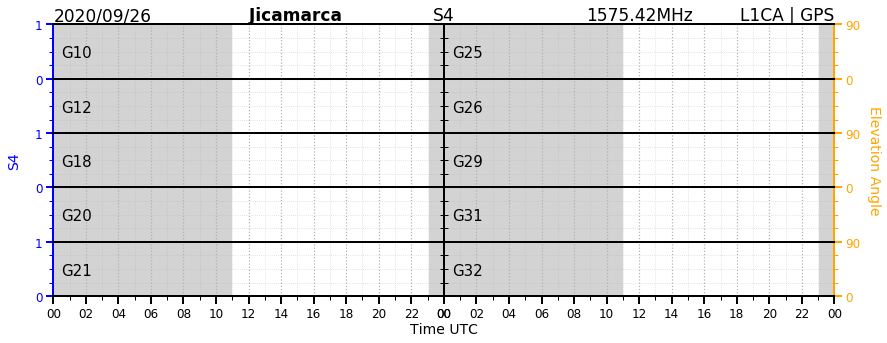

In [60]:
# Test
plot_s4('G', freq_list[0])

'Ok'

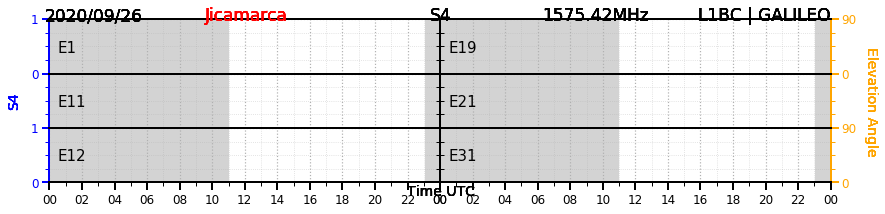

In [43]:
plot_s4('E', freq_list[0])